TUGAS 2: k-Means Clustering
===========

Astri Cahyaningtyas
==============
1301154548

IF-39-02

In [9]:
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [10]:
# Load data
data = pd.read_csv('TrainsetTugas2.csv') #Train Set
test = pd.read_csv('TestsetTugas2.csv') #Test Set
all = pd.read_csv('AllTugas2.csv') #Gabungan Train Set dan Test Set untuk mempermudah gambar grafik dan perhitungan
#print(data.shape)
#data.head()
#print(test.shape)
#test.head()

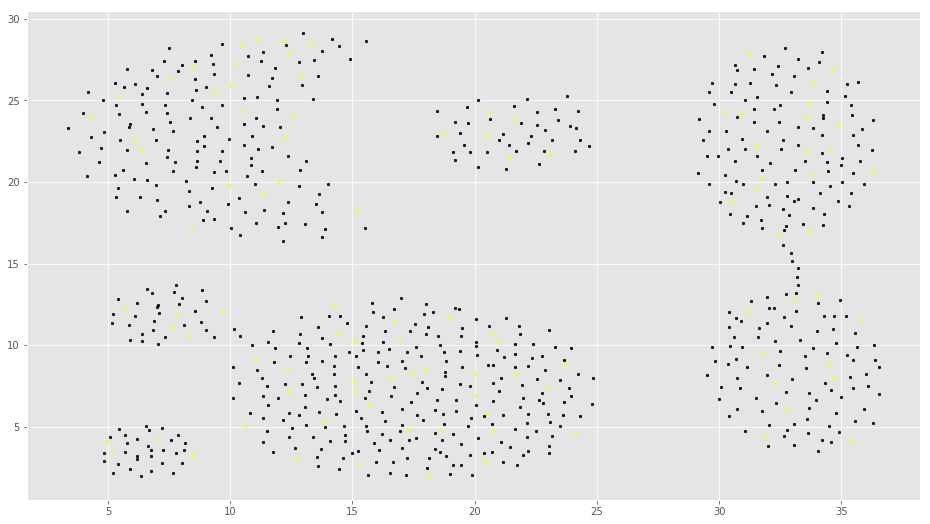

In [15]:
# Membuat gambar grafik plot
x0_train = data['x0'].values
x1_train = data['x1'].values
X_train = np.array(list(zip(x0_train, x1_train)))
plt.scatter(x0_train, x1_train, c='black', s=7) #yang hitang train set

x0_test = test['x0'].values
x1_test = test['x1'].values
X_test = np.array(list(zip(x0_test, x1_test)))
plt.scatter(x0_test, x1_test, c='yellow', s=7) #yang kuning test set

x0 = all['x0'].values
x1 = all['x1'].values
X = np.array(list(zip(x0, x1)))

In [16]:
# Menghitung jarak Euclidean
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

In [17]:
# Banyaknya k cluster
k = 3
# XO nilai centroid random 
C_x0 = np.random.randint(0, np.max(X)-20, size=k)
# X1 nilai centroid random
C_x1 = np.random.randint(0, np.max(X)-20, size=k)
C = np.array(list(zip(C_x0, C_x1)), dtype=np.float32)
print(C)

[[  1.   2.]
 [ 12.  13.]
 [ 12.   2.]]


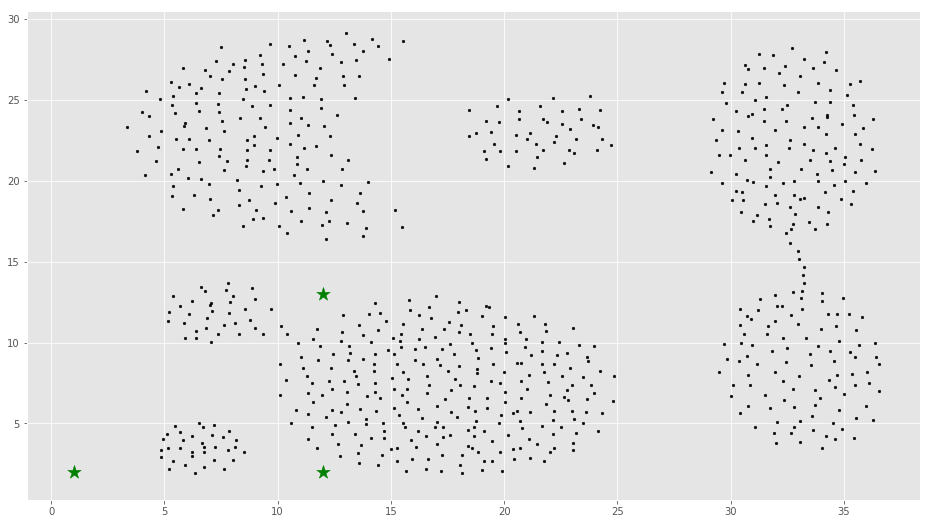

In [18]:
# Centroid diletakkan ke dalam grafik plot
plt.scatter(x0, x1, c='#050505', s=7)
plt.scatter(C_x0, C_x1, marker='*', s=200, c='g')

In [19]:
# Menyimpan nilai centroid, selalu update
C_old = np.zeros(C.shape)
# Label(0, 1, 2)
clusters = np.zeros(len(X))
# Error func. Jarak antar centroid lama dna baru
error = dist(C, C_old, None)
# Loop sampai error 0
while error != 0:
    # Assigning each value to its closest cluster
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # Storing the old centroid values
    C_old = deepcopy(C)
    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)

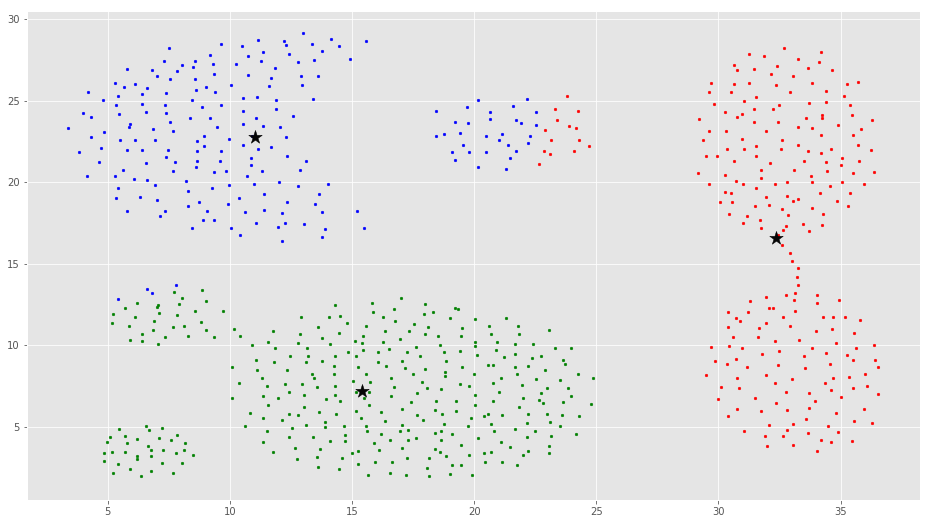

In [21]:
colors = ['b', 'r', 'g', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')